# 太陽位置の計算

参考: http://k-ichikawa.blog.enjoy.jp/etc/HP/js/sunShineAngle/ssa.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import cos, sin, asin, atan2, pi, ceil

# 太陽赤緯

太陽赤緯：δ（太陽光線と地球の赤道面との角度、±23°27'の範囲で変化）　[単位： 度]

$δ = 0.33281 - 22.984 \cdot cos(ωJ ) - 0.34990 \cdot cos(2ωJ ) - 0.13980 \cdot cos(3ωJ ) + 3.7872 \cdot sin(ωJ ) + 0.03250 \cdot sin(2ωJ ) + 0.07187 \cdot sin(3ωJ )$

ここで、
　　　　ω = 2π/365、閏年は ω = 2π/366、J： 元日からの通算日数 + 0.5

閏年は考慮していない）


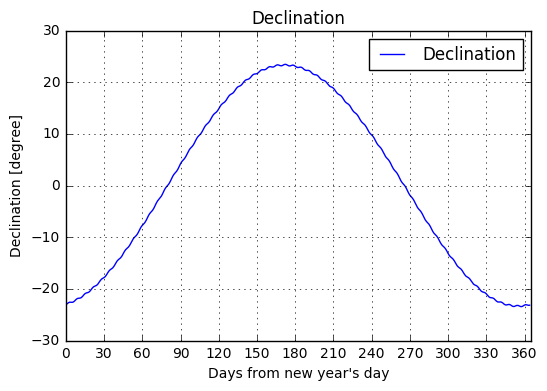

In [2]:
def get_decl(d):
    omega = 2.0 * pi / 365
    J = d + 0.5
    decl = 0.33281 - 22.984 * cos(omega*J) - 0.34990*cos(2.0*omega*J) - 0.1390 * cos(3.0*omega+J) + 3.7872*sin(omega*J) + 0.03250*sin(2.0*omega*J) + 0.07187 * sin(3.0*omega*J)
    return decl

days = range(365)
plt.title("Declination")
plt.plot(days, [get_decl(d) for d in days], label='Declination')
plt.xlabel("Days from new year's day")
plt.ylabel("Declination [degree]")
plt.xlim(0,365)
plt.xticks([x*30 for x in range(13)])
plt.grid()
plt.legend(loc="upper right")
plt.show()

# 均時差

均時差：　e（天球上を一定な速さで動くと考えた平均太陽と、実際の太陽との移動の差、17分未満）　[単位： 時間]

$e = 0.0072 cos(ωJ ) - 0.0528 cos(2ωJ ) - 0.0012 cos(3ωJ ) - 0.1229 sin(ωJ ) - 0.1565 sin(2ωJ ) - 0.0041 sin(3ωJ )$

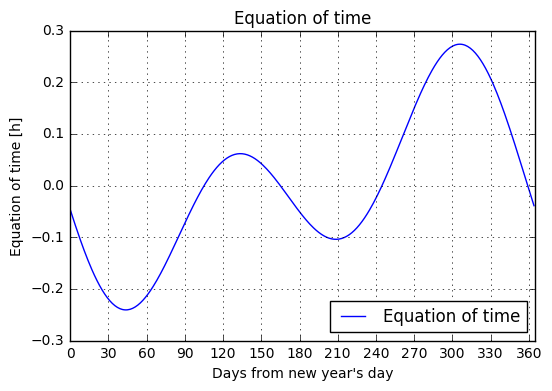

In [3]:
def get_et(d):
    omega = 2.0 * pi / 365
    J = d
    et = 0.0072 * cos(omega*J) - 0.0528*cos(2.0*omega*J) - 0.0012*cos(3.0*omega*J) - 0.1229*sin(omega*J) - 0.1565*sin(2.0*omega*J) - 0.0041*sin(3.0*omega*J)
    return et

days = range(365)
plt.title("Equation of time")
plt.plot(days, [get_et(d) for d in days], label='Equation of time')
plt.xlabel("Days from new year's day")
plt.ylabel("Equation of time [h]")
plt.xlim(0,365)
plt.xticks([x*30 for x in range(13)])
plt.grid()
plt.legend(loc="lower right")
plt.show()

# 時角

時角：　t　[単位： 度]

$T = T_s + (\theta - 135)/15 + e$

$t = 15 \cdot T - 180$

ここで、

Ts：　時刻（中央標準時）

$\theta$ ：　東経

φ：　北緯


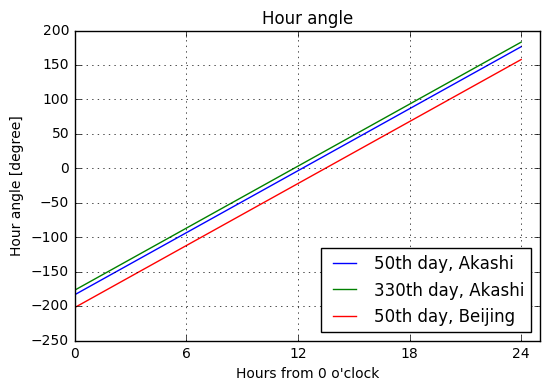

In [4]:
def deg_norm(deg):
    return deg - ceil((deg-180) / 360)*360

def get_hourangle(d, Ts, longtitude):
    T = Ts + (longtitude - 135)/15 + get_et(d)
    t = 15*T - 180
    return t


hours = range(25)
plt.title("Hour angle")
plt.plot(hours, [get_hourangle(50, h, 135) for h in hours], label='50th day, Akashi')
plt.plot(hours, [get_hourangle(330, h, 135) for h in hours], label='330th day, Akashi')
plt.plot(hours, [get_hourangle(50, h, 116.39) for h in hours], label='50th day, Beijing')
plt.xlabel("Hours from 0 o'clock")
plt.ylabel("Hour angle [degree]")
plt.xticks([0,6,12,18,24])
plt.grid()
plt.legend(loc="lower right")
plt.show()


# 太陽高度

高度（仰角）：　h

$h = asin(sin(φ)sin(δ) + cos(φ)cos(δ)cos(t))$

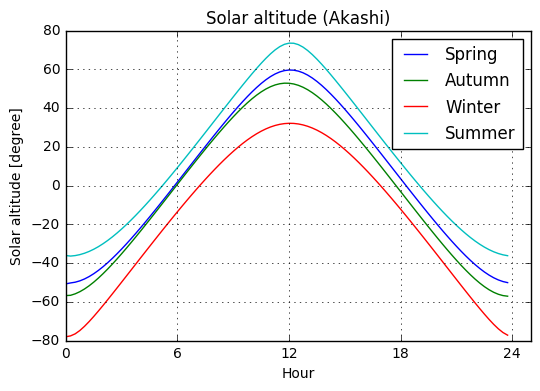

In [9]:
def get_h(d, Ts, longtitude, latitude):
    decl_rad = get_decl(d) * pi / 180
    t_rad = get_hourangle(d, Ts, longtitude) * pi / 180
    lat_rad = latitude * pi / 180
    h = asin(sin(lat_rad) * sin(decl_rad) + cos(lat_rad) * cos(decl_rad) * cos(t_rad))
    h *= 180 / pi
    return h

hours = [i/4 for i in range(24*4)]
seasons = {"Winter":0, "Spring":90, "Summer":210, "Autumn":270}
for label, d in seasons.items():
    plt.plot(hours, [get_h(ceil(h/24)+d, h%24, 135, 35) for h in hours], label=label)

plt.title("Solar altitude (Akashi)")
plt.xlabel("Hour")
plt.ylabel("Solar altitude [degree]")
plt.xticks([0,6,12,18,24])
plt.grid()
plt.legend(loc="upper right")
plt.show()

# 太陽方位角

方位角：　A（北 = 0, 東 = 90, 南 = 180, 西 = 270°）

$sinA = \cfrac{cos(\delta)sin(t)}{cos(h)}$

$cosA = \cfrac{sin(h)sin(φ) - sin(\delta)}{cos(h) \cdot cos(φ)}$

$A = atan2(sinA, cosA) + \pi $


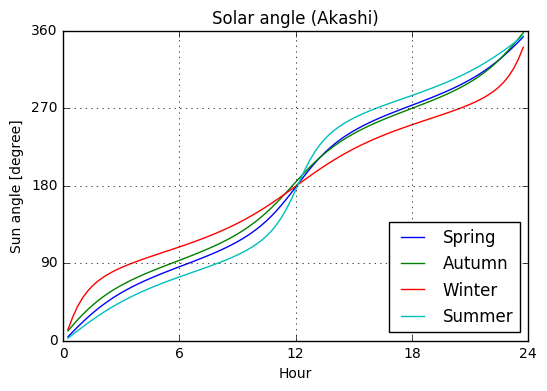

In [7]:
def get_A(d, Ts, longtitude, latitude):
    decl_rad = get_decl(d) * pi / 180
    h_rad = get_h(d, Ts, longtitude, latitude) * pi / 180
    t_rad = get_hourangle(d, Ts, longtitude) * pi / 180
    lat_rad = latitude * pi / 180
    sinA = cos(decl_rad) * sin(t_rad) / cos(h_rad)
    cosA = (sin(h_rad) * sin(lat_rad) - sin(decl_rad)) / (cos(h_rad) * cos(lat_rad))
    A = atan2(sinA, cosA) + pi
    A *= 180 / pi
    return A

hours = [(i+1)/4 for i in range(24*4-1)]
seasons = {"Winter":0, "Spring":90, "Summer":210, "Autumn":270}
for label, d in seasons.items():
    plt.plot(hours, [get_A(ceil(h/24)+d, h%24, 135, 35) for h in hours], label=label)

plt.title("Solar angle (Akashi)")
plt.xlabel("Hour")
plt.ylabel("Sun angle [degree]")
plt.xticks([0,6,12,18,24])
plt.yticks([0,90,180,270,360])
plt.xlim(0,24)
plt.ylim(0,360)
plt.legend(loc="lower right")
plt.grid()
plt.show()